# Figure 1. Light Curves for our sample

Now that we have settled on a samples (that have good quality SEDs, `generate_sed_sample.ipynb`), let's generate a figure with all the light curves of the SNe in the sample.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import re
import corner

from lltypeiip.config import config
from lltypeiip.photometry import get_wise_lc_data, get_ztf_lc_data, convert_ZTF_mag_mJy, plot_combined_lc
from lltypeiip.sed import build_multi_epoch_seds_from_tail, plot_sed
from lltypeiip.dusty import fit_grid_to_sed, plot_best_fit_dusty_model

from alerce.core import Alerce

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
sed_sample_path = "/home/cal/analam/Documents/LL_typeIIP/sed_sample.txt"

with open(sed_sample_path, 'r') as file:
    oids = [line.rstrip() for line in file]
print(f"{len(oids)} OIDs")
print(oids)

20 OIDs
['ZTF18abjndhh', 'ZTF19aadnxnl', 'ZTF19aanrrqu', 'ZTF19aapafit', 'ZTF19aarykkb', 'ZTF19acbwejj', 'ZTF19aclobbu', 'ZTF21aagtqna', 'ZTF21ablvzhp', 'ZTF21abnlhxs', 'ZTF21abouuat', 'ZTF21acpqqgu', 'ZTF22aativsd', 'ZTF22aaywnyg', 'ZTF22abtspsw', 'ZTF23aanymcl', 'ZTF23aaxadel', 'ZTF23abaxtlq', 'ZTF23abnogui', 'ZTF24aaemydm']


Processing ZTF18abjndhh...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns


Saved ztf_resdict for ZTF18abjndhh to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF18abjndhh_cand_lc.png
Processing ZTF19aadnxnl...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns


Saved ztf_resdict for ZTF19aadnxnl to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF19aadnxnl_cand_lc.png


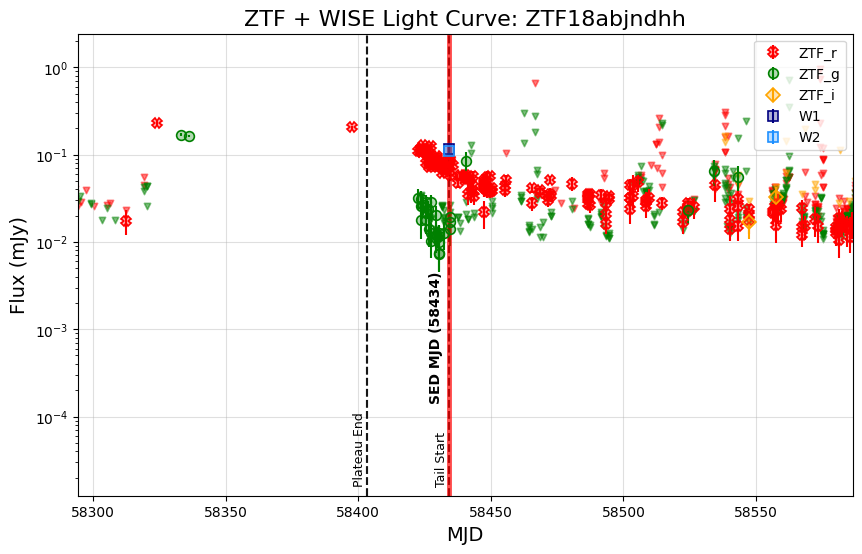

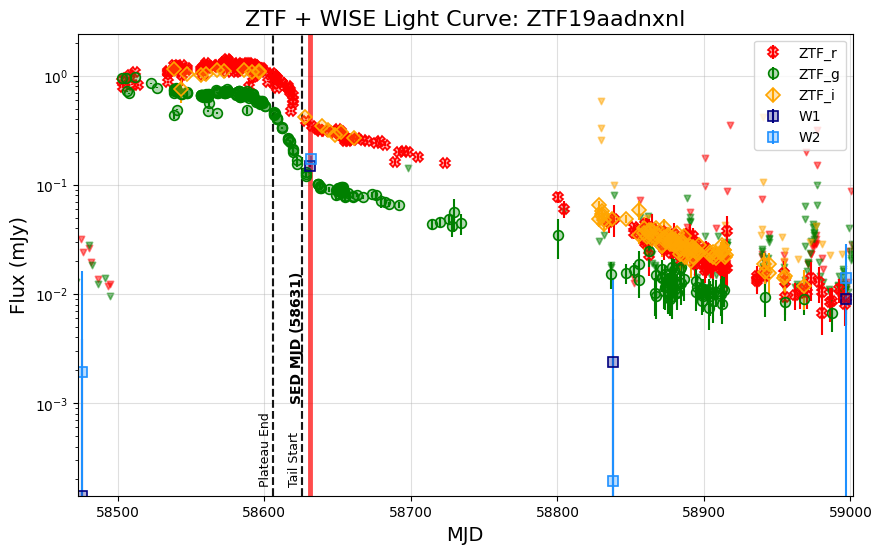

In [ ]:
alerce = Alerce()

for oid in oids:
    print(f"Processing {oid}...")
    wise_resdict = get_wise_lc_data(oid)
    ztf_resdict = get_ztf_lc_data(oid, alerce, doLC=False, doStamps=False, add_forced=True)
    ztf_resdict = convert_ZTF_mag_mJy(ztf_resdict, forced=True)
    
    seds = build_multi_epoch_seds_from_tail(
        ztf_resdict, wise_resdict, 
        min_detected_bands=4,
        require_wise_detection=True,
        max_dt_ztf=5.0,
        max_dt_wise=5.0
    )

    if len(seds) > 0:
        best = max(seds, key=lambda sed: (len(sed["bands"]), sed["mjd"]))
        sed_mjd = best['mjd']

    plot_combined_lc(ztf_resdict, wise_resdict, oid=oid, 
                 ztf_flux=True, mode="overlay", scale_wise=True, baseline_ref="wise_parity",
                 ref_band="r", logy=True, mark_plateau_end=True, mark_tail_start=True, mark_custom_mjd=sed_mjd,
                 savepath=f"/home/cal/analam/Documents/LL_typeIIP/figures/light_curves/{oid}_cand_lc.png");
